<a href="https://colab.research.google.com/github/itskipronoh/house-prices-with-regression-algorithm-and-sklearn/blob/main/house_prices_with_reressions_algorithm_and_sk_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the necessary libraries

In [1]:
!pip install pandas==2.2.2
!pip install matplotlib==3.8.4
!pip install seaborn==0.13.2
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


importing required libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

Defining elper functions

In [2]:
def two_d_compare(X_test, y_test, y_pred, model_name):
    plt.subplots(ncols=2, figsize=(10, 4))
    plt.suptitle('Actual vs Predicted data : ' + model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()


def model_metrics(regressor, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("Root mean squared error: %.2f" % math.sqrt(mse))
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2)
    return [mse, r2]


def two_vs_three(x_test,y_test,y_pred,z=None, isLinear = False):
    area = 60

    fig = plt.figure(figsize=(6,6))
    fig.suptitle('view of sales price data')

    # First subplot
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_test, y_test, alpha=0.5,color='blue', s= area)
    ax.scatter(x_test, y_pred, alpha=0.5,color='red', s= area)
#     ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('YEARBUILT')
    ax.set_ylabel('SELLING PRICE')

    plt.title('YEARBUILT vs SALEPRICE')

    plt.show()


load data set

In [3]:
df_pd =  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/O9xijcDVZM-5MCjMyPtxwQ/house-price.csv")
df_pd.head()

,ID,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,1,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,2,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,3,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,4,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,5,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [4]:
df_pd.columns

Index(['ID', 'LOTAREA', 'BLDGTYPE', 'HOUSESTYLE', 'OVERALLCOND', 'YEARBUILT',
       'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION', 'BSMTCOND', 'HEATING',
       'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL', 'FULLBATH', 'HALFBATH',
       'BEDROOMABVGR', 'KITCHENABVGR', 'KITCHENQUAL', 'TOTRMSABVGRD',
       'FIREPLACES', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH', 'GARAGECARS',
       'GARAGECOND', 'POOLAREA', 'POOLQC', 'FENCE', 'MOSOLD', 'YRSOLD',
       'SALEPRICE'],
      dtype='object')

Data exploration

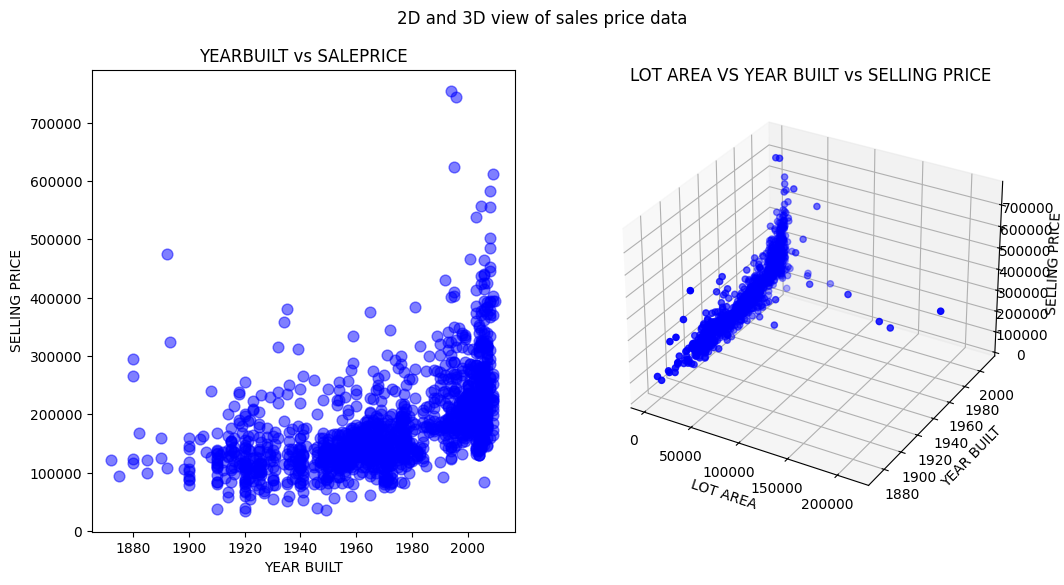

In [5]:
area = 60
x = df_pd['YEARBUILT']
y = df_pd['SALEPRICE']
z = df_pd['LOTAREA']


fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of sales price data')

# First subplot
ax = fig.add_subplot(1, 2, 1)

ax.scatter(x, y, alpha=0.5,color='blue', s=area)
ax.set_xlabel('YEAR BUILT')
ax.set_ylabel('SELLING PRICE')

plt.title('YEARBUILT vs SALEPRICE')

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, color='blue', marker='o')

ax.set_ylabel('YEAR BUILT')
ax.set_zlabel('SELLING PRICE')
ax.set_xlabel('LOT AREA')

plt.title('LOT AREA VS YEAR BUILT vs SELLING PRICE')

plt.show()

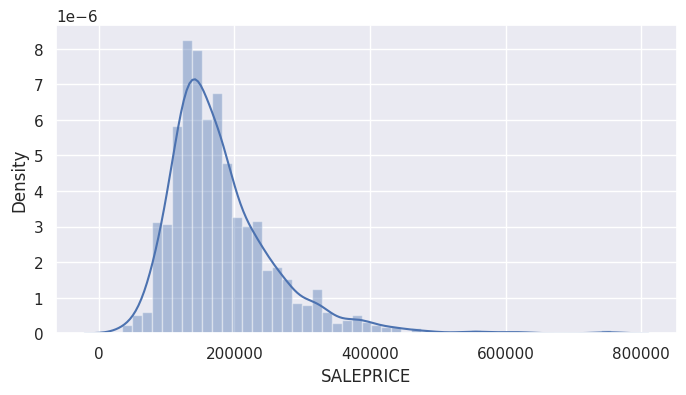

In [6]:
sns.set(rc={"figure.figsize": (8, 4)})
np.random.seed(0)
ax = sns.distplot(df_pd['SALEPRICE'])
plt.show()

In [7]:
print("The dataset contains columns of the following data types : \n" +str(df_pd.dtypes))

The dataset contains columns of the following data types : 
ID               int64
LOTAREA          int64
BLDGTYPE        object
HOUSESTYLE      object
OVERALLCOND      int64
YEARBUILT        int64
ROOFSTYLE       object
EXTERCOND       object
FOUNDATION      object
BSMTCOND        object
HEATING         object
HEATINGQC       object
CENTRALAIR      object
ELECTRICAL      object
FULLBATH         int64
HALFBATH         int64
BEDROOMABVGR     int64
KITCHENABVGR     int64
KITCHENQUAL     object
TOTRMSABVGRD     int64
FIREPLACES       int64
FIREPLACEQU     object
GARAGETYPE      object
GARAGEFINISH    object
GARAGECARS       int64
GARAGECOND      object
POOLAREA         int64
POOLQC          object
FENCE           object
MOSOLD           int64
YRSOLD           int64
SALEPRICE        int64
dtype: object


In [8]:
print("The dataset contains following number of records for each of the columns : \n" +str(df_pd.count()))

The dataset contains following number of records for each of the columns : 
ID              1460
LOTAREA         1460
BLDGTYPE        1460
HOUSESTYLE      1460
OVERALLCOND     1460
YEARBUILT       1460
ROOFSTYLE       1460
EXTERCOND       1460
FOUNDATION      1460
BSMTCOND        1423
HEATING         1460
HEATINGQC       1460
CENTRALAIR      1460
ELECTRICAL      1459
FULLBATH        1460
HALFBATH        1460
BEDROOMABVGR    1460
KITCHENABVGR    1460
KITCHENQUAL     1460
TOTRMSABVGRD    1460
FIREPLACES      1460
FIREPLACEQU      770
GARAGETYPE      1379
GARAGEFINISH    1379
GARAGECARS      1460
GARAGECOND      1379
POOLAREA        1460
POOLQC             7
FENCE            281
MOSOLD          1460
YRSOLD          1460
SALEPRICE       1460
dtype: int64


Data preparation

In [9]:
#remove columns that are not required
df_pd = df_pd.drop(['ID'], axis=1)

df_pd.head()

,LOTAREA,BLDGTYPE,HOUSESTYLE,OVERALLCOND,YEARBUILT,ROOFSTYLE,EXTERCOND,FOUNDATION,BSMTCOND,HEATING,...,GARAGETYPE,GARAGEFINISH,GARAGECARS,GARAGECOND,POOLAREA,POOLQC,FENCE,MOSOLD,YRSOLD,SALEPRICE
0,8450,1Fam,2Story,5,2003,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,2,2008,208500
1,9600,1Fam,1Story,8,1976,Gable,TA,CBlock,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,5,2007,181500
2,11250,1Fam,2Story,5,2001,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,2,TA,0,NaN,NaN,9,2008,223500
3,9550,1Fam,2Story,5,1915,Gable,TA,BrkTil,Gd,GasA,...,Detchd,Unf,3,TA,0,NaN,NaN,2,2006,140000
4,14260,1Fam,2Story,5,2000,Gable,TA,PConc,TA,GasA,...,Attchd,RFn,3,TA,0,NaN,NaN,12,2008,250000


In [10]:
# Defining the categorical columns

categoricalColumns = df_pd.select_dtypes(include=['object']).columns

print("Categorical columns: ")
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy='most_frequent')
onehot_categorical = OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute', impute_categorical),
                                          ('onehot', onehot_categorical)])

Categorical columns: 
Index(['BLDGTYPE', 'HOUSESTYLE', 'ROOFSTYLE', 'EXTERCOND', 'FOUNDATION',
       'BSMTCOND', 'HEATING', 'HEATINGQC', 'CENTRALAIR', 'ELECTRICAL',
       'KITCHENQUAL', 'FIREPLACEQU', 'GARAGETYPE', 'GARAGEFINISH',
       'GARAGECOND', 'POOLQC', 'FENCE'],
      dtype='object')


In [11]:
# Defining the numerical columns
numericalColumns = [col for col in df_pd.select_dtypes(include=['float', 'int']).columns if col not in ['SALEPRICE']]
print("Numerical columns: ")
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns: 
['LOTAREA', 'OVERALLCOND', 'YEARBUILT', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'POOLAREA', 'MOSOLD', 'YRSOLD']


In [12]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),
                                                            ('num',numerical_transformer,numericalColumns)],
                                              remainder="passthrough")

In [13]:
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp)

df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 2.00800e+03
  2.08500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.00700e+03
  1.81500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 9.00000e+00 2.00800e+03
  2.23500e+05]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 5.00000e+00 2.01000e+03
  2.66500e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 4.00000e+00 2.01000e+03
  1.42125e+05]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 6.00000e+00 2.00800e+03
  1.47500e+05]]
Data after transforming :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.59911110e+00
   1.38777489e-01  2.08500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
  -6.14438622e-01  1.81500000e+05]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  9.90891347e-01
   1.38777489e-01  2.23500000e+05]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.89110051e-01
   1.64520971e+00  2.66500000e+05]
 [ 1.00000000e+00  0.00000000e+

In [14]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df_pd.drop(['SALEPRICE'], axis=1)

label = pd.DataFrame(df_pd, columns=['SALEPRICE'])
label = np.log(df_pd['SALEPRICE'])

print("value of label: \n" + str(label))

value of label: 
0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SALEPRICE, Length: 1460, dtype: float64


In [15]:
X = features['YEARBUILT'].values.reshape(-1,1)
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X, label, random_state=0)

print("Dimensions of datasets that will be used for training: Input features"
      + str(X_train_slr.shape)
      + ". Output label" + str(y_train_slr.shape))
print("Dimensions of datasets that will be used for testing: Input features"
      + str(X_test_slr.shape)
      + ". Output label"
      + str(y_test_slr.shape))

Dimensions of datasets that will be used for training: Input features(1095, 1). Output label(1095,)
Dimensions of datasets that will be used for testing: Input features(365, 1). Output label(365,)


In [16]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

slRegressor = LinearRegression()

slRegressor.fit(X_train_slr, y_train_slr)

y_pred_slr = slRegressor.predict(X_test_slr)

print(slRegressor)

LinearRegression()


In [17]:
print('Intercept: \n',slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 -3.3916251243597006
Coefficients: 
 [0.00782031]


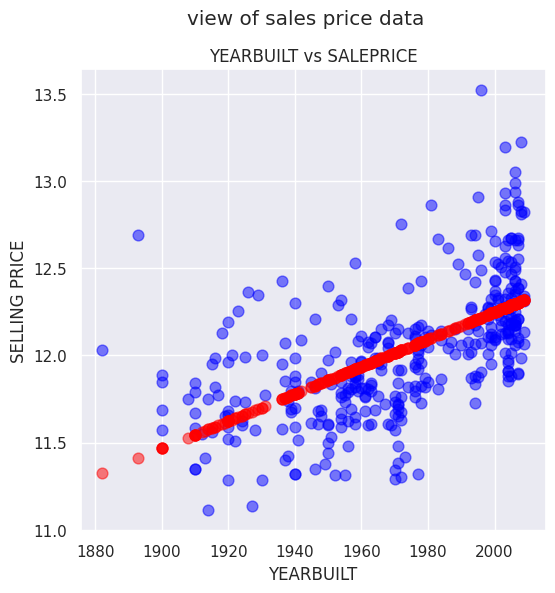

In [18]:
two_vs_three(X_test_slr[:, 0], y_test_slr, y_pred_slr, None, True)

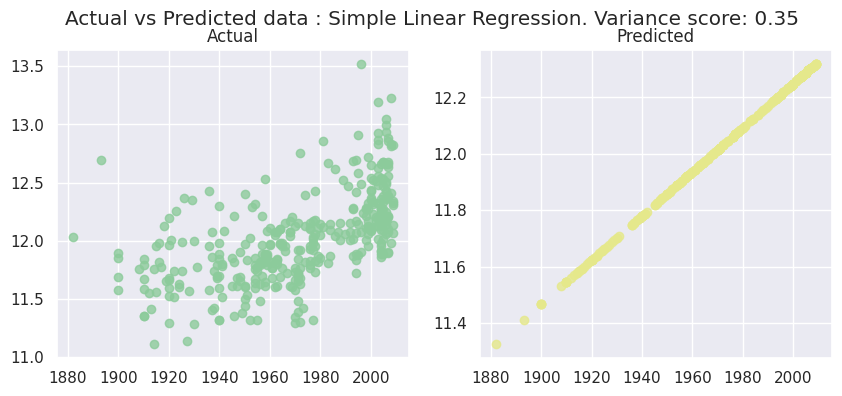

In [19]:
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)

In [20]:
slrMetrics = model_metrics(slRegressor,y_test_slr,y_pred_slr)

Root mean squared error: 0.31
R2 score: 0.35


multiple linear regression model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) +
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) +
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30). Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30). Output label(365,)


In [22]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', mlRegressor)])

mlr_model.fit(X_train, y_train)

y_pred_mlr = mlr_model.predict(X_test)

print(mlRegressor)

LinearRegression()


In [23]:
print('Intercept: \n', mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)

Intercept: 
 3633416912729.439
Coefficients: 
 [-2.13317991e+08 -2.13317991e+08 -2.13317991e+08 -2.13317991e+08
 -2.13317991e+08  1.93853438e+12  1.93853438e+12  1.93853438e+12
  1.93853438e+12  1.93853438e+12  1.93853438e+12  1.93853438e+12
  1.93853438e+12  6.76923461e+11  6.76923461e+11  6.76923461e+11
  6.76923461e+11  6.76923461e+11  6.76923461e+11 -6.03730547e+11
 -6.03730547e+11 -6.03730547e+11 -6.03730547e+11 -6.03730547e+11
 -1.20261093e+12 -1.20261093e+12 -1.20261093e+12 -1.20261093e+12
 -1.20261093e+12 -1.20261093e+12 -4.18885861e+11 -4.18885861e+11
 -4.18885861e+11 -4.18885861e+11 -1.55170504e+11 -1.55170504e+11
 -1.55170504e+11 -1.55170504e+11 -1.55170504e+11 -1.55170504e+11
 -6.40627069e+11 -6.40627069e+11 -6.40627069e+11 -6.40627069e+11
 -6.40627069e+11  9.11183971e+11  9.11183971e+11  1.74959364e+11
  1.74959364e+11  1.74959364e+11  1.74959364e+11  1.74959364e+11
 -1.00153357e+12 -1.00153357e+12 -1.00153357e+12 -1.00153357e+12
 -1.77083049e+11 -1.77083049e+11 -1.7708304

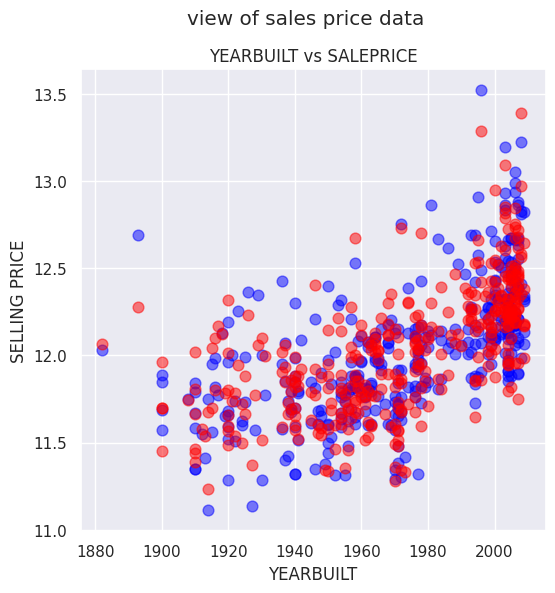

In [24]:
two_vs_three(X_test['YEARBUILT'],y_test,y_pred_mlr,X_test['LOTAREA'], True)

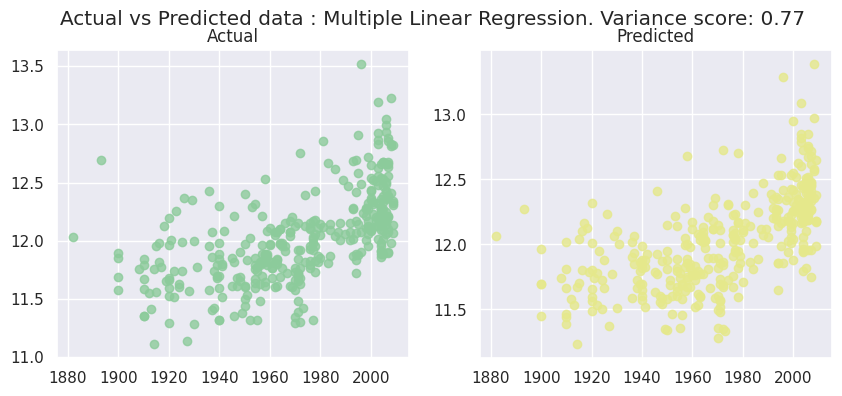

In [25]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_mlr, model_name)

In [26]:
mlrMetrics = model_metrics(slRegressor, y_test, y_pred_mlr)

Root mean squared error: 0.18
R2 score: 0.77


Decision tree regression



In [27]:
X_train, X_test, y_train, y_test = train_test_split(features,np.log(df_pd['SALEPRICE']) , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1095, 30). Output label(1095,)
Dimensions of datasets that will be used for testing : Input features(365, 30). Output label(365,)


In [28]:
from sklearn.tree import DecisionTreeRegressor

model_name = "Decision Tree Regressor"

decisionTreeRegressor = DecisionTreeRegressor(random_state=0, max_features=30)

dtr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', decisionTreeRegressor)])

dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_test)

print(decisionTreeRegressor)

DecisionTreeRegressor(max_features=30, random_state=0)


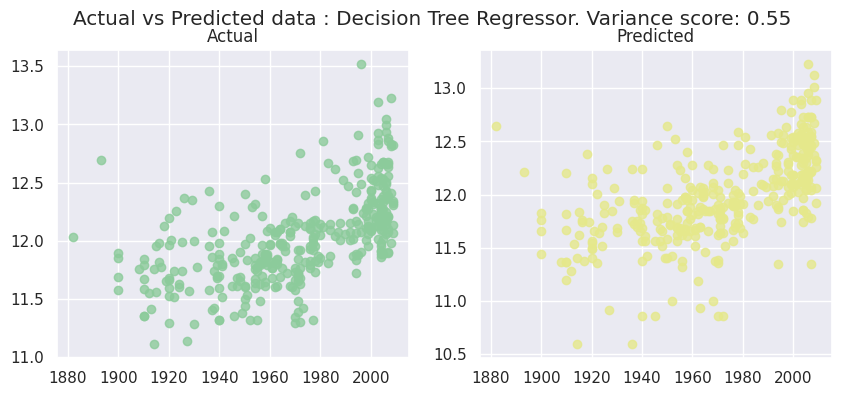

In [29]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_dtr, model_name)

In [30]:
dtrMetrics = model_metrics(decisionTreeRegressor, y_test, y_pred_dtr)

Root mean squared error: 0.26
R2 score: 0.55


random forest regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', randomForestRegressor)])

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

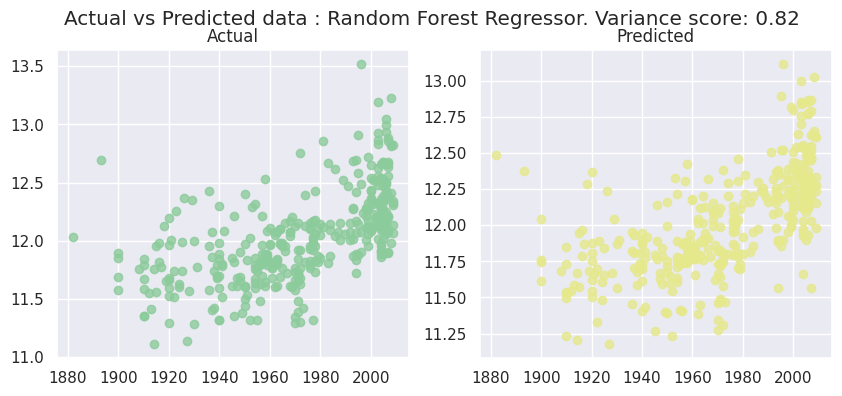

In [32]:
two_d_compare(X_test['YEARBUILT'], y_test, y_pred_rfr, model_name)

In [33]:
rfrMetrics = model_metrics(randomForestRegressor, y_test, y_pred_rfr)

Root mean squared error: 0.16
R2 score: 0.82


Comparative study of different regression algorithms

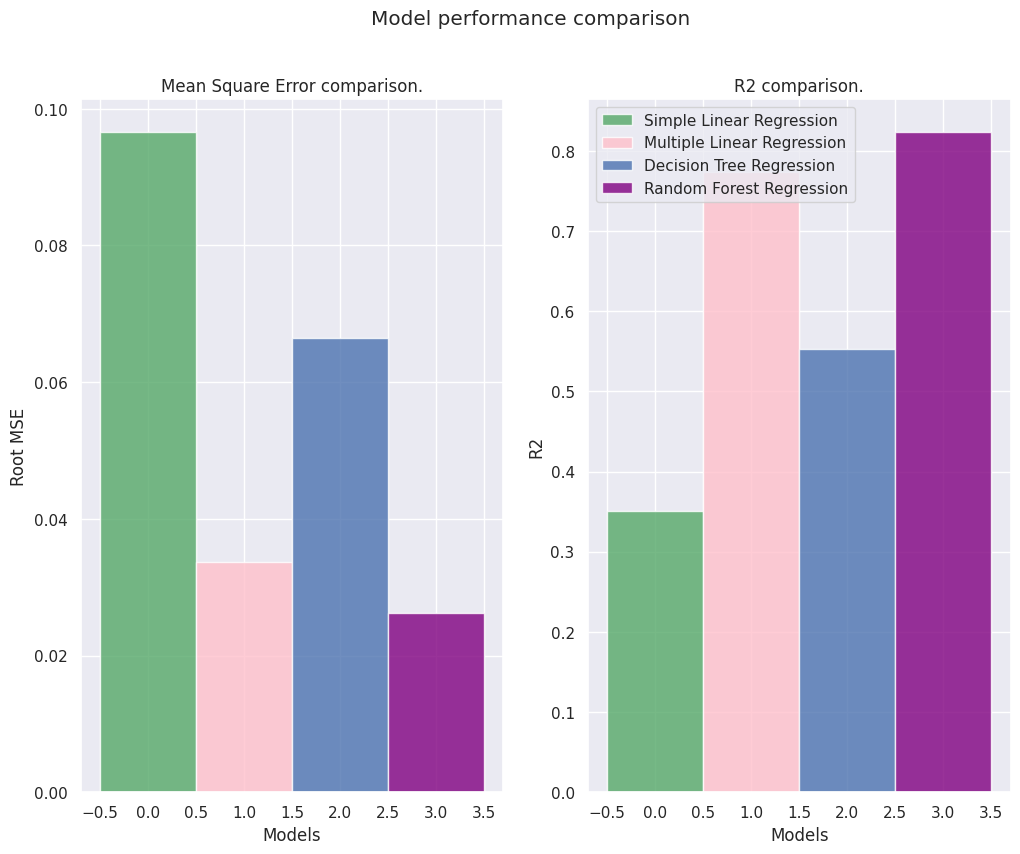

In [34]:
n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8


area = 60
plt.subplots(ncols=2, figsize=(12, 9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, slrMetrics[0], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[0], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')


rects4 = plt.bar(index + bar_width*2, dtrMetrics[0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')


rects6 = plt.bar(index + bar_width*3, rfrMetrics[0], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('Root MSE')
plt.title('Mean Square Error comparison.')

plt.subplot(122)

rects1 = plt.bar(index, slrMetrics[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[1], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width*2, dtrMetrics[1], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')


rects6 = plt.bar(index + bar_width*3, rfrMetrics[1], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))

plt.legend()
plt.show()